## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Exploration and Preprocessing:

In [2]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
## data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
### Missing_value
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
## summary statistics
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
df.duplicated().sum()

np.int64(24)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

np.int64(0)

## StandardScaler:
#### Apply Standard Scaling (mean = 0, std = 1) for normally distributed features.

In [10]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
num_col = df.select_dtypes(include = ['int64','float64']).columns
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [12]:
### Standardscaler
std_sca = StandardScaler()
df_std = df.copy()
df_std[num_col] = std_sca.fit_transform(df[num_col])
df_std[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32556,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32557,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32558,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32559,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


#### `Apply Min-Max Scaling (0 to 1 range) for features that are not normally distributed or when bounded features are needed.

In [13]:
## MinMax Scaler
minmax_sca = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_col] = minmax_sca.fit_transform(df[num_col])
df_minmax[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## 2. Encoding Techniques:

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### One-Hot Encoding :

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('income')

In [22]:
#One-Hot Encoding for columns with ≤ 5 categories
one_hot_cols = [col for col in cat_cols if df[col].nunique() <= 5]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [23]:
#Label Encoding for columns with > 5 categories
label_cols = [col for col in cat_cols if df[col].nunique() > 5]
lab_enc = LabelEncoder()
for col in label_cols:
    df[col] = lab_enc.fit_transform(df[col])

In [24]:
#Encode the target column
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [25]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,7,77516,9,13,4,1,1,2174,0,40,39,NaN,False,False,False,True,True
1,50,6,83311,9,13,2,4,0,0,0,13,39,NaN,False,False,False,True,True
2,38,4,215646,11,9,0,6,1,0,0,40,39,NaN,False,False,False,True,True
3,53,4,234721,1,7,2,6,0,0,0,40,39,NaN,False,True,False,False,True
4,28,4,338409,9,13,2,10,5,0,0,40,5,NaN,False,True,False,False,False


In [26]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male']


## 3. Feature Engineering

#### Create two new features

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
## Feature 1: Create 'age_bucket' by binning age into categories
bins = [0, 25, 45, 65, 100]     ## bins: Defines ranges of age (0–25, 25–45, etc.).
labels = ['Young', 'Adult', 'Senior', 'Elderly']   ## labels: Names for each bin.
df['age_bucket'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_bucket']

,age_bucket
0,Adult
1,Senior
2,Adult
3,Senior
4,Adult
...,...
32556,Adult
32557,Adult
32558,Senior
32559,Young


In [29]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male', 'age_bucket']


In [30]:
## Feature 2: Create 'capital_diff' as the difference between capital-gain and capital-loss
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['capital_diff']

,capital_diff
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


Text(0.5, 1.0, 'Before Log Transformation: capital-gain')

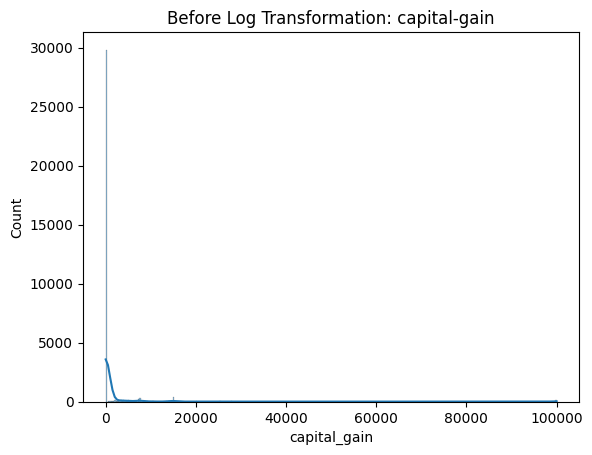

In [31]:
fig = plt.figsize=(12, 4)
sns.histplot(df['capital_gain'], kde=True)
plt.title("Before Log Transformation: capital-gain")

### Apply log transformation

In [32]:
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain']

,log_capital_gain
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
32556,0.000000
32557,0.000000
32558,0.000000
32559,0.000000


##  Visualize after transformation

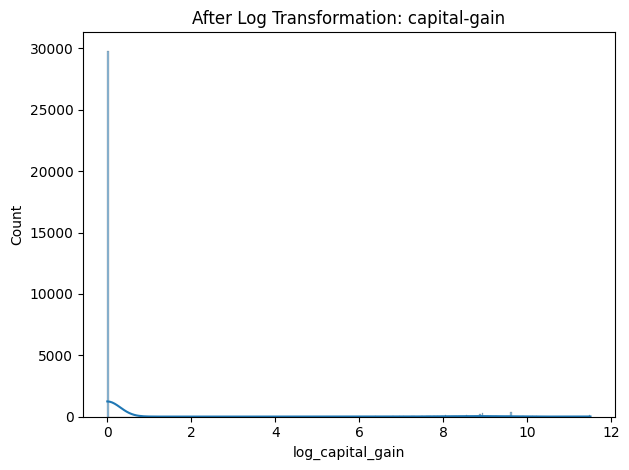

In [33]:
sns.histplot(df['log_capital_gain'], kde=True)
plt.title("After Log Transformation: capital-gain")
plt.tight_layout()
plt.show()

## 4. Feature Selection:

### Use the Isolation Forest algorithm to identify and remove outliers

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df[num_col])
df = df[outliers == 1]  # Keep only inliers

## PPS (Predictive Power Score)

In [36]:
!pip install ppscore

  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.0
    Uninstalling pandas-2.3.0:
      Successfully uninstalled pandas-2.3.0
ERROR: Operation cancelled by user


In [37]:
!pip install --upgrade --force-reinstall numpy pandas

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
Using cached pandas-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninsta

In [38]:
import ppscore as pps

In [39]:
pps_matrix = pps.matrix(df)
pps_matrix[pps_matrix['y'] == 'income'][['x', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)

,x,ppscore
264,income,1.0
33,workclass,0.0
54,fnlwgt,0.0
75,education,0.0
12,age,0.0
96,education_num,0.0
117,marital_status,0.0
159,relationship,0.0
138,occupation,0.0
180,capital_gain,0.0


In [41]:
# Select only numerical columns from the main DataFrame
numeric_df = df[num_col]  # not num_col.corr()
numeric_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


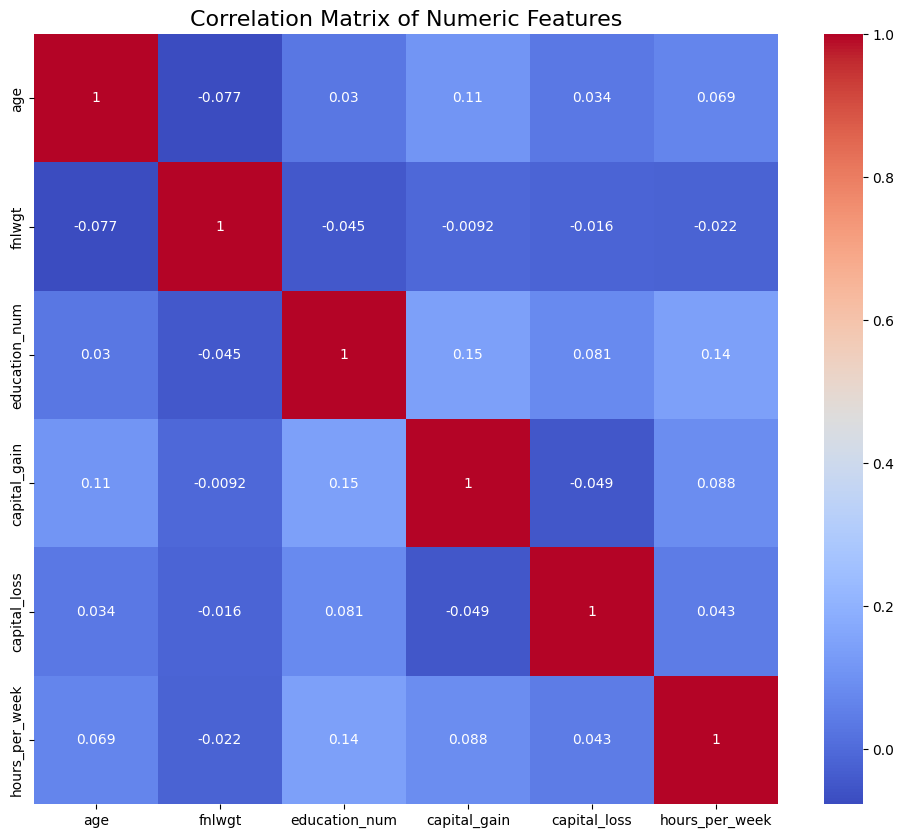

In [44]:
# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show();